## Data Wrangling

##### Import dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Import seaborn library and ignore warning 
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

##### Import datasets

In [10]:
pop_df = pd.read_csv("Data/population_total.csv")
inet_df = pd.read_csv("Data/net_users_num.csv")
cell_df = pd.read_csv("Data/cell_phones_total.csv")
suic_df = pd.read_csv("Data/suicide_total_deaths.csv")
#gini_df = pd.read_csv("Data/inequality_index_gini.csv")
gdp_df = pd.read_csv("Data/gdppercapita.csv")

##### Check imported datasets

In [11]:
pop_df.head(3)
gdp_df.head(3)
inet_df.head(3)
cell_df.head(3)
gdp_df.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100


*Suicide dataset contains data from 1990 to 2016; therefore I decided to perform data analysis for the years between 1990 to 2016 (included). I kept these columns using iloc method with numpy.*

##### Filtering dataset using iloc and numpy

In [12]:
# Keep only the columns 1990 - 2016 - try to do this in the function or for loop!
# suicide dataset already sliced (1990 - 2016)
# QUESTION - is there better way of doing this 
pop_df = pop_df.iloc[:, np.r_[:1, 191:218]]
inet_df = inet_df.iloc[:, :28]
cell_df = cell_df.iloc[:, np.r_[:1, 31:58]]
#gini_df = gini_df.iloc[:, np.r_[:1, 24:51]]
gdp_df = gdp_df.iloc[:, np.r_[:1, 191:218]]

##### Handling null values

In [14]:
# Check null values for internet and cell usage
#suic_df.isnull().sum()
#pop_df.isnull().sum()
#gdp_df.isnull().sum()
#cell_df.isnull().sum()
inet_df.isnull().sum()

country     0
1990        3
1991        3
1992        3
1993        3
1994        3
1995        3
1996       34
1997       21
1998       17
1999       12
2000        8
2001        5
2002        3
2003        3
2004        1
2005        1
2006        2
2007        2
2008        2
2009        2
2010        3
2011        2
2012        2
2013        1
2014        1
2015        1
2016        1
dtype: int64

*Only internet and cell datasets have null values. After examining these datasets I noticed a positive trend for all countries; therefore I decided to use `ffill` method (fill forward) instead of filling with mean or 0. I believe a better way to fill null values would be average values between empty cells. Any suggestions?*

In [15]:
# fill first colum [1990] with null if empty 
# (I use this to fill the first column with 0. When usind ffill to populate 0 instesd of country name.)
inet_df['1990'].fillna(0, inplace=True)
cell_df['1990'].fillna(0, inplace=True)

In [16]:
# fill null values for internet and cell phone
inet_df = inet_df.fillna(method='ffill', axis=1)
cell_df = cell_df.fillna(method='ffill', axis=1)

##### Unpivot dataframes

In [17]:
pop_df = pop_df.melt(id_vars = 'country', var_name = 'year', value_name = 'population_total', ignore_index=True)
inet_df = inet_df.melt(id_vars = 'country', var_name = 'year', value_name = 'internet_use', ignore_index=True)
cell_df = cell_df.melt(id_vars = 'country', var_name = 'year', value_name = 'cell_use', ignore_index=True)
suic_df = suic_df.melt(id_vars = 'country', var_name = 'year', value_name = 'suicide_total', ignore_index=True)
#gini_df = gini_df.melt(id_vars = 'country', var_name = 'year', value_name = 'gini_index', ignore_index=True)
gdp_df = gdp_df.melt(id_vars = 'country', var_name = 'year', value_name = 'GDP', ignore_index=True)

*In order to compare different indicators I reshaped data with `melt` method.*

##### Merge datasets

In [18]:
# Merge datasets two by two - please see comments below
merged01 = pd.merge(pop_df, inet_df, how="inner", on=["country", "year"])
merged02 = pd.merge(suic_df, gdp_df, how="inner", on=["country", "year"])
merged03_df = pd.merge(merged01, merged02, how="inner", on=["country", "year"])
merged_df = pd.merge(merged03_df, cell_df, how="inner", on=["country", "year"])

In [20]:
# Check merged dataset
merged_df.head(3)

,country,year,population_total,internet_use,suicide_total,GDP,cell_use
0,Afghanistan,1990,12400000,0,703.0,1860,0
1,Albania,1990,3290000,0,127.0,4460,0
2,Algeria,1990,25800000,0,806.0,10300,470


***QUESTIONS***
*Is there a better way of merging multiple datasets in one step*
*what is the best way to double-check if the merge was successful? I checked data in a spreadsheet but didn’t find this method to be found convenient, especially when working with a large dataset, the xlxs or csv file won’t load or will crash*


In [ ]:
# Export dataset for investigation - not sure if this method is good. Please see the comment above.
#merged_df.to_csv('Data/merged.csv', index=False)

##### Checking dataset (shape, null values, datatypes and duplicates) after merging

In [21]:
# Shape
merged_df.shape

(5049, 7)

In [22]:
# Duplicate rows
merged_df.duplicated().sum()

0

In [23]:
# Missing values - decide what to do with null values
merged_df.isnull().sum()

country             0
year                0
population_total    0
internet_use        0
suicide_total       0
GDP                 0
cell_use            0
dtype: int64

In [24]:
# Check individual datatypes - convert year to int
merged_df.dtypes

country              object
year                 object
population_total      int64
internet_use         object
suicide_total       float64
GDP                   int64
cell_use             object
dtype: object

#### Changing datatypes

In [28]:
# Change data types for internet use - scientific 
merged_df['internet_use'] = merged_df['internet_use'].astype(float)
merged_df['year'] = merged_df['year'].astype(int)
merged_df['cell_use'] = merged_df['cell_use'].astype(int)

In [29]:
# Round suicide & change to integer (suicide was in float)
merged_df['suicide_total'] = merged_df.suicide_total.round()
merged_df['suicide_total'] = merged_df['suicide_total'].astype(int)

In [30]:
# Check datatypes
merged_df.dtypes

country              object
year                  int32
population_total      int64
internet_use        float64
suicide_total         int32
GDP                   int64
cell_use              int32
dtype: object

#### Feature engeenering 

In [31]:
# Calculate proportions of internet users, cell users, and the number of suicides % per country and year.
merged_df['internet_use_%'] = merged_df.internet_use/merged_df.population_total*100
merged_df['cell_use_%'] = merged_df.cell_use/merged_df.population_total*100
merged_df['suicide_total_%'] = merged_df.suicide_total/merged_df.population_total*100

In [32]:
# Calculate proportions per capita (per 100,000 people) for internet users, cell users, and the number of suicides.
merged_df['internet_use_pc'] = merged_df.internet_use/merged_df.population_total*100000
merged_df['cell_use_pc'] = merged_df.cell_use/merged_df.population_total*100000
merged_df['suicide_total_pc'] = merged_df.suicide_total/merged_df.population_total*100000

In [33]:
# Check newly created columns in whole dataframe.
merged_df.head(5)

,country,year,population_total,internet_use,suicide_total,GDP,cell_use,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,12400000,0.0,703,1860,0,0.0,0.000000,0.005669,0.0,0.000000,5.669355
1,Albania,1990,3290000,0.0,127,4460,0,0.0,0.000000,0.003860,0.0,0.000000,3.860182
2,Algeria,1990,25800000,0.0,806,10300,470,0.0,0.001822,0.003124,0.0,1.821705,3.124031
3,Andorra,1990,54500,0.0,5,28400,0,0.0,0.000000,0.009174,0.0,0.000000,9.174312
4,Angola,1990,11800000,0.0,645,4760,0,0.0,0.000000,0.005466,0.0,0.000000,5.466102


*For a better comparison between countries, I create new columns % of total proportions per capita (per 100,000 people).*

## EDA

*In this analysis I will use columns per capita (per 100,000 people); therefore I used `iloc` method to keep only columns created in feature engineering*

In [68]:
# Create df with columns per capita only
pc_df = merged_df.iloc[:, np.r_[:2, 5:6, 10:13]]
pc_df.head(3)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,0.0,0.000000,5.669355
1,Albania,1990,4460,0.0,0.000000,3.860182
2,Algeria,1990,10300,0.0,1.821705,3.124031


# From 1990 - 2016

## For all countries

#### FEW INVESTIGATING QUESTIONS

In [69]:
# Country and year with most suicides per capita - used idxmax to find the row where this information is:
most_suicides_pc = pc_df.suicide_total_pc.idxmax(axis=1)
most_suicides_pc

886

In [70]:
# Used iloc method to display data whit index found in the previous cell.
most_suicides_pc = pc_df.iloc[886,:]
most_suicides_pc

country              Russia
year                   1994
GDP                   13400
internet_use_pc     53.9189
cell_use_pc         18.7162
suicide_total_pc    51.6216
Name: 886, dtype: object

In [71]:
# Find a country and year with most suicides per capita - this is another way to get the same answer as cells above.
most_suicides_pc1 = pc_df.groupby(['country','year']).mean()['suicide_total_pc'].idxmax(axis=1)
most_suicides_pc1

('Russia', 1994)

In [72]:
# Year with most suicides per capita.
worst_year = pc_df.groupby(['year']).mean()['suicide_total_pc'].idxmax(axis=1)
worst_year

1995

In [73]:
# Country and year with least suicides per capita.
least_year = pc_df.groupby(['country','year']).mean()['suicide_total_pc'].idxmin(axis=1)
least_year

('Sao Tome and Principe', 2002)

In [74]:
# Year with least suicides per capita.
least_year = pc_df.groupby(['year']).mean()['suicide_total_pc'].idxmin(axis=1)
least_year

2015

#### HISTOGRAM

In [75]:
# Summary statistics
#main_df.describe()

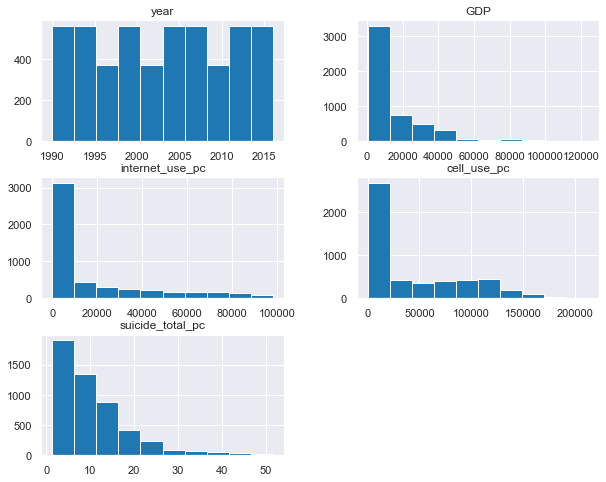

In [77]:
# Plotting histograms 
pc_df.hist(figsize=(10,8), color='#1f77b4');

*Explain the histograms* 

#### CORRELATION

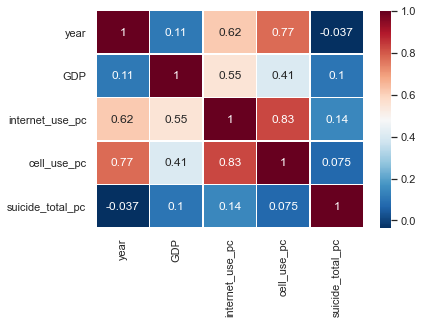

In [76]:
# Plotting correlation coeficient heat map.
pearsoncorr = pc_df.corr(method='pearson')
pearsoncorr
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

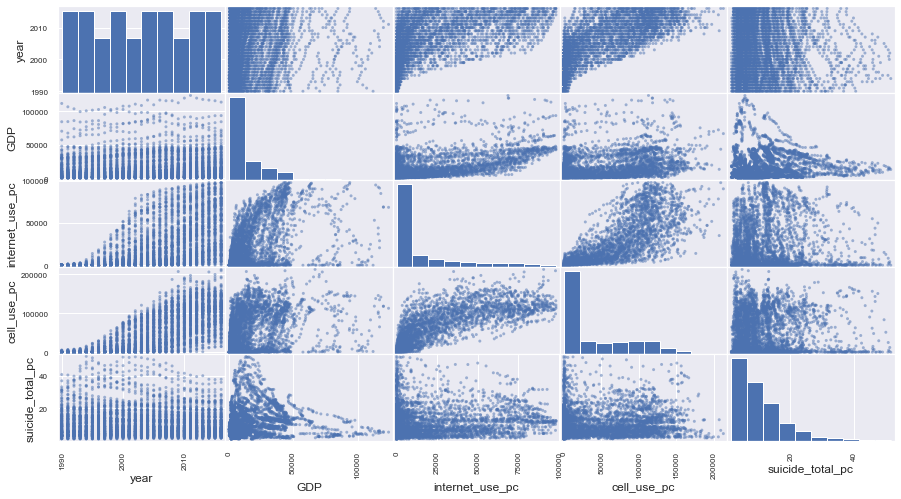

In [149]:
# scatter plot matrix
pd.plotting.scatter_matrix(pc_df, figsize=(15,8));

*Explain the matrix*

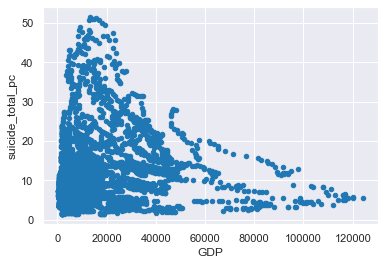

In [78]:
# Scatter plot between GDP and suicide
pc_df.plot(x='GDP', y='suicide_total_pc', kind='scatter', c='#1f77b4');

#### OUTLIERS

<AxesSubplot:>

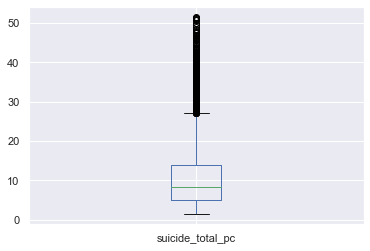

In [153]:
pc_df.suicide_total_pc.plot(kind='box')

<AxesSubplot:>

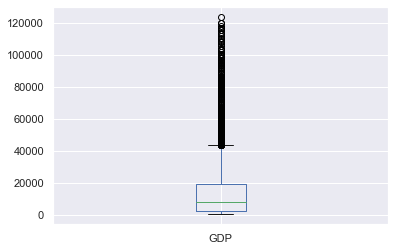

In [152]:
pc_df.GDP.plot(kind='box')

#### SUICIDE TREND

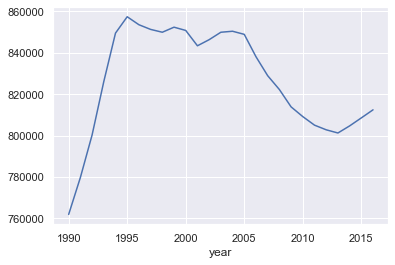

In [81]:
# Suicide trend (here I used acctual number of suicides (not per capita))
# What is the overall trend in suicide globally
suicide_trend_all = merged_df.groupby(['year']).sum()['suicide_total'].plot();
suicide_trend_all;

*Explant the line chart*

## Top 10 and bottom 10 countries with most/least suicides per capita

In [98]:
### This cell is only for reference (note on the code that might be useful in the future).
## suicide_top10_ = pc_df.groupby(['country']).agg({'suicide_total_pc': ['mean','min', 'max']})
## suicide_top10_.columns =  ['s_mean','s_min', 's_max']                                          
## suicide_top10_

In [99]:
# Top 10 countries from 1990 - 2016, get top 10 and save in a list.
suicide_top10 = pc_df.groupby(['country']).mean()['suicide_total_pc'].nlargest(10).to_frame().index.tolist()

In [102]:
# Bottom 10 countries from 1990 - 2016, get bottom 10 and save in a list.
suicide_bottom10 = pc_df.groupby(['country']).mean()['suicide_total_pc'].nsmallest(11).to_frame().index.tolist()

In [104]:
# Remove Kuwait (recognized as outlier = GPA >100,000)
suicide_bottom10.remove("Kuwait")

*Note: I found top 11, because during my analyis I found outlier - Kuwait, has GDP far above the average (100,000). Therefore, I excluded this country form analysis and replace it with next country in the bottom 10.*

In [96]:
# get the data frame for top 10
top_10_countries_suicide = pc_df[pc_df['country'].isin(suicide_top10)]
top_10_countries_suicide.head(2)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
15,Belarus,1990,8370,0.0,0.0,24.215686
55,Estonia,1990,14300,0.0,0.0,30.000000


In [105]:
# get the data frame for top 10
bottom_10_countries_suicide = pc_df[pc_df['country'].isin(suicide_bottom10)]
bottom_10_countries_suicide.head(2)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
5,Antigua and Barbuda,1990,17500,0.0,0.0,1.600000
11,Bahamas,1990,31000,0.0,750.0,2.734375


### Compare top and bottom 10 countries (summary statistics, GDP, trend, internet use, cell phone use)

#### Summary statistics

In [106]:
# Top 10
top_10_countries_suicide.describe()

,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2003.000000,15475.037037,24973.506555,59099.954357,33.934861
std,7.803345,7162.594634,28542.198417,58347.859254,7.761825
min,1990.000000,3610.000000,0.000000,0.000000,19.015152
25%,1996.000000,8837.500000,362.115065,488.549465,27.427362
50%,2003.000000,15100.000000,8948.192471,41595.029796,33.927374
75%,2010.000000,21900.000000,53236.651204,115182.719645,39.302554
max,2016.000000,31100.000000,87878.787879,179761.904762,51.621622


In [107]:
# Bottom 10
bottom_10_countries_suicide.describe()

,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2003.000000,17559.518519,18392.023323,45707.569221,2.373274
std,7.803345,15372.655107,22390.672175,53408.665349,0.554937
min,1990.000000,1960.000000,0.000000,0.000000,1.360544
25%,1996.000000,5315.000000,54.975879,627.088134,1.949191
50%,2003.000000,9340.000000,7977.663591,20574.468085,2.331982
75%,2010.000000,29700.000000,28103.645847,77552.469939,2.720394
max,2016.000000,50500.000000,79894.179894,197088.465845,3.678571


*Describe summary stats*

#### GDP comparison

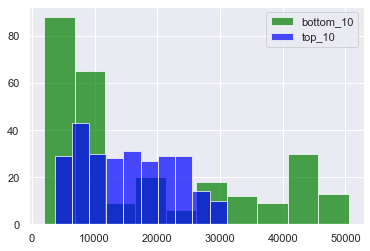

In [113]:
# histogram - GDP
bottom_10_countries_suicide.GDP.hist(alpha=.7, color='green', label='bottom_10'), top_10_countries_suicide.GDP.hist(alpha=.7, color='blue', label='top_10');
# legend
plt.legend();

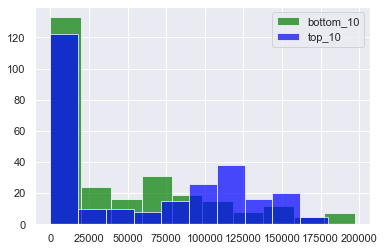

In [117]:
# histogram - cell use
bottom_10_countries_suicide.cell_use_pc.hist(alpha=.7, color='green', label='bottom_10'), top_10_countries_suicide.cell_use_pc.hist(alpha=.7, color='blue', label='top_10');
# legend
plt.legend();

#### Suicide Trend

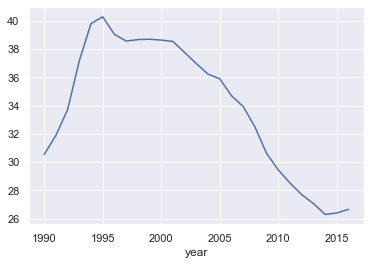

In [109]:
# Top 10 - suicide trend
trend_top10 = top_10_countries_suicide.groupby(['year']).mean()['suicide_total_pc'].plot();
trend_top10;

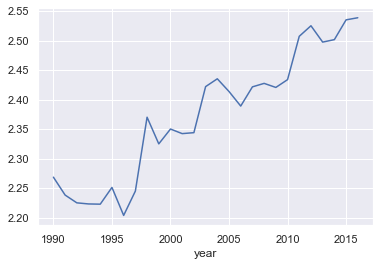

In [111]:
# Bottom 10 - suicide trend
trend_bottom10 = bottom_10_countries_suicide.groupby(['year']).mean()['suicide_total_pc'].plot();
trend_bottom10;

#### GDP Trend

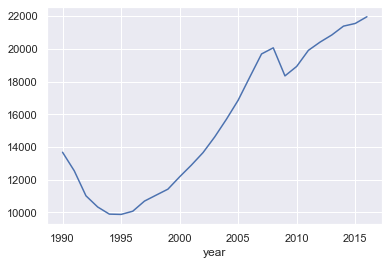

In [115]:
# Top 10 - GDP trend
trend_top10_GDP = top_10_countries_suicide.groupby(['year']).mean()['GDP'].plot();
trend_top10_GDP;

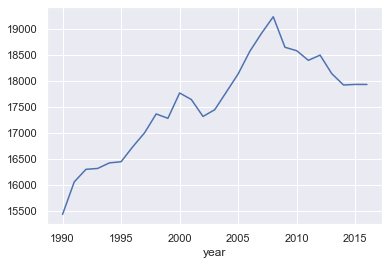

In [116]:
# Bottom 10 - GDP trend
trend_bottom10_GDP = bottom_10_countries_suicide.groupby(['year']).mean()['GDP'].plot();
trend_bottom10_GDP;

*Explain Trend*

In [ ]:
# Acctuals countries

# From 2010 - 2016

In [120]:
# Create df for only 2010 - 2016
main_df_reduced = merged_df.loc[merged_df.year > 2009,:]
main_df_reduced.tail()

,country,year,population_total,internet_use,suicide_total,GDP,cell_use,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
5044,Venezuela,2016,29900000,17900000.0,2970,15200,27600000,59.866221,92.307692,0.009933,59866.220736,92307.692308,9.933110
5045,Vietnam,2016,93600000,49600000.0,7740,5900,121000000,52.991453,129.273504,0.008269,52991.452991,129273.504274,8.269231
5046,Yemen,2016,27200000,6680000.0,1450,2620,16400000,24.558824,60.294118,0.005331,24558.823529,60294.117647,5.330882
5047,Zambia,2016,16400000,4170000.0,1380,3700,12000000,25.426829,73.170732,0.008415,25426.829268,73170.731707,8.414634
5048,Zimbabwe,2016,14000000,3240000.0,2200,2490,12900000,23.142857,92.142857,0.015714,23142.857143,92142.857143,15.714286


## For all countries

In [121]:
# Create df with columns per capita only
pc_df_reduced = main_df_reduced.iloc[:, np.r_[:2, 5:6, 10:13]]
pc_df_reduced.head(3)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
3740,Afghanistan,2010,1670,4006.849315,34931.506849,6.027397
3741,Albania,2010,9930,45084.745763,91186.440678,6.610169
3742,Algeria,2010,12900,12500.000000,91111.111111,3.583333


#### HISTOGRAM

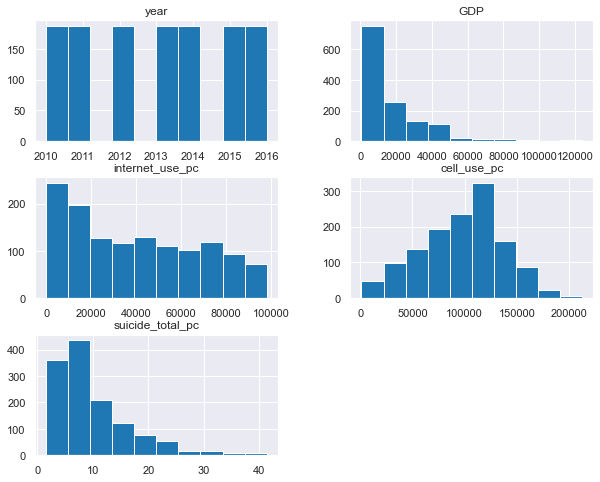

In [122]:
# Plotting histograms 
pc_df_reduced.hist(figsize=(10,8), color='#1f77b4');

#### CORRELATION

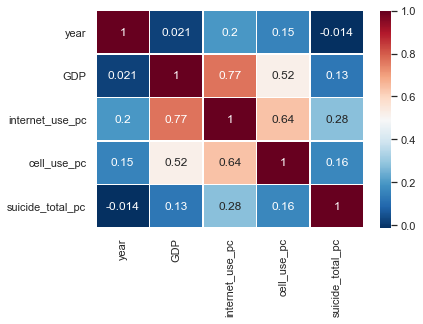

In [123]:
# Plotting correlation coeficient heat map.
pearsoncorr_reduced = pc_df_reduced.corr(method='pearson')
pearsoncorr_reduced
sns.heatmap(pearsoncorr_reduced, 
            xticklabels=pearsoncorr_reduced.columns,
            yticklabels=pearsoncorr_reduced.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

*Explain the matrix*

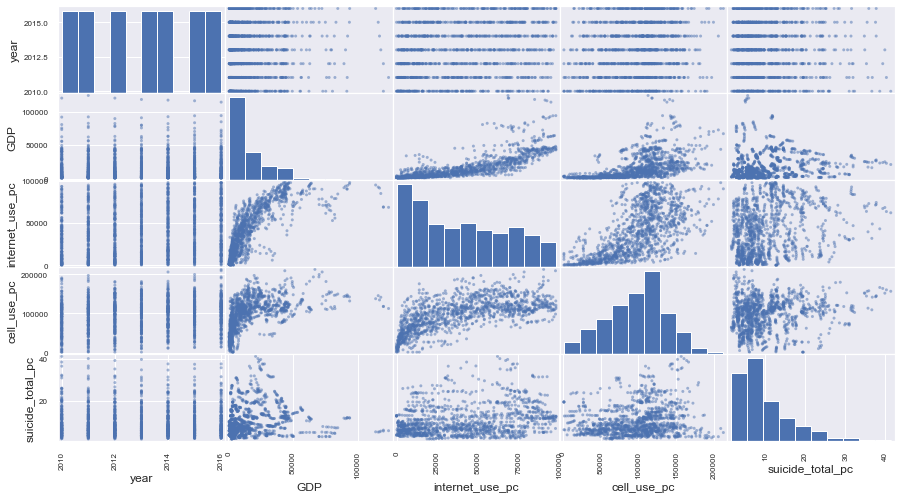

In [155]:
# scatter plot matrix
pd.plotting.scatter_matrix(pc_df_reduced, figsize=(15,8));

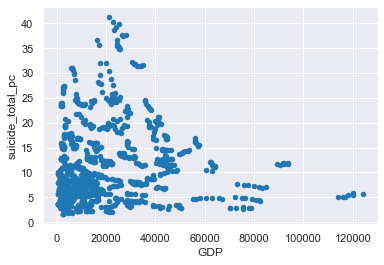

In [124]:
# Scatter plot between GDP and suicide
pc_df_reduced.plot(x='GDP', y='suicide_total_pc', kind='scatter', c='#1f77b4');

#### SUICIDE TREND

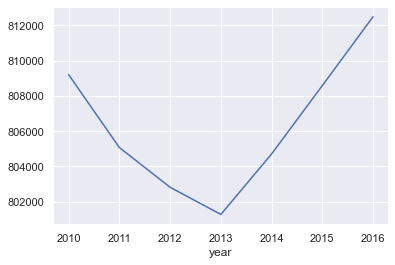

In [128]:
# Suicide trend (here I used acctual number of suicides (not per capita))
# What is the overall trend in suicide globally
suicide_trend_all_reduced = main_df_reduced.groupby(['year']).sum()['suicide_total'].plot();
suicide_trend_all_reduced;

*Explain the line chart*

## Top 10 and bottom 10 countries with most/least suicides per capita

In [129]:
# Top 10 countries from 2010 - 2016, get top 10 and save in a list.
suicide_top10_reduced = pc_df_reduced.groupby(['country']).mean()['suicide_total_pc'].nlargest(10).to_frame().index.tolist()

In [133]:
# Top 10 countries from 2010 - 2016, get top 10 and save in a list.
suicide_bottom10_reduced = pc_df_reduced.groupby(['country']).mean()['suicide_total_pc'].nsmallest(11).to_frame().index.tolist()

In [135]:
# Remove Kuwait (recognized as outlier = GPA >100,000)
suicide_bottom10_reduced.remove("Kuwait")

*Note: I found top 11, because during my analyis I found outlier - Kuwait, has GDP far above the average (100,000). Therefore, I excluded this country form analysis and replace it with next country in the bottom 10.*

In [137]:
# get the data frame for top 10
top_10_countries_suicide_reduced = pc_df_reduced[pc_df_reduced['country'].isin(suicide_top10)]
top_10_countries_suicide_reduced.head(2)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
3755,Belarus,2010,16300,31847.133758,109341.825902,36.624204
3795,Estonia,2010,22700,74210.526316,124060.150376,20.827068


In [138]:
# get the data frame for top 10
bottom_10_countries_suicide_reduced = pc_df_reduced[pc_df_reduced['country'].isin(suicide_bottom10)]
bottom_10_countries_suicide_reduced.head(2)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
3745,Antigua and Barbuda,2010,20700,47045.454545,190909.090909,2.272727
3751,Bahamas,2010,29700,43098.591549,120563.380282,3.098592


### Compare top and bottom 10 countries (summary statistics, GDP, trend, internet use, cell phone use)

#### Summary statistics

In [140]:
# Top 10
top_10_countries_suicide_reduced.describe()

,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2013.000000,20709.857143,59885.920443,129554.998887,27.434405
std,2.014441,6671.378297,20100.963065,21277.678476,6.072702
min,2010.000000,7470.000000,11970.443350,85714.285714,19.015152
25%,2011.000000,17275.000000,48916.109874,113779.599549,23.724739
50%,2013.000000,22950.000000,68260.613208,124775.173227,25.011962
75%,2015.000000,25275.000000,72946.859903,144318.181818,31.555877
max,2016.000000,29900.000000,87878.787879,179761.904762,41.346154


In [141]:
# Bottom 10
bottom_10_countries_suicide_reduced.describe()

,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2013.000000,18196.428571,49558.846133,107869.387789,2.505610
std,2.014441,15820.280970,18409.813140,42728.812449,0.539585
min,2010.000000,2560.000000,18777.777778,54672.897196,1.562500
25%,2011.000000,4657.500000,35106.113440,71580.895952,2.141136
50%,2013.000000,10595.000000,47197.638934,95330.315225,2.287341
75%,2015.000000,29475.000000,66117.021277,147959.876543,2.918640
max,2016.000000,50500.000000,79894.179894,197088.465845,3.527397


*Explain summary statistics*

#### GDP comparison

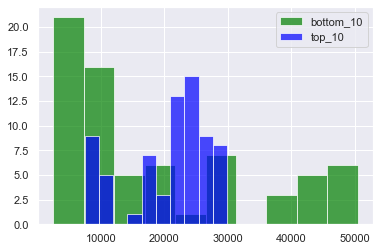

In [142]:
# histogram - GDP
bottom_10_countries_suicide_reduced.GDP.hist(alpha=.7, color='green', label='bottom_10'), top_10_countries_suicide_reduced.GDP.hist(alpha=.7, color='blue', label='top_10');
# legend
plt.legend();

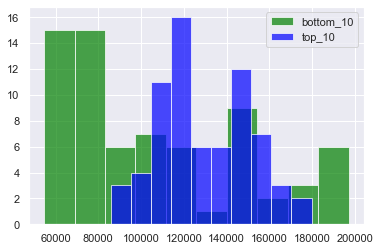

In [143]:
# histogram - cell use
bottom_10_countries_suicide_reduced.cell_use_pc.hist(alpha=.7, color='green', label='bottom_10'), top_10_countries_suicide_reduced.cell_use_pc.hist(alpha=.7, color='blue', label='top_10');
# legend
plt.legend();

#### Suicide Trend

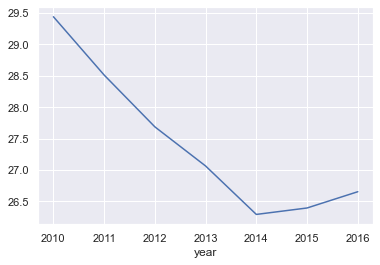

In [144]:
# Top 10 - suicide trend
trend_top10_reduced = top_10_countries_suicide_reduced.groupby(['year']).mean()['suicide_total_pc'].plot();
trend_top10_reduced;

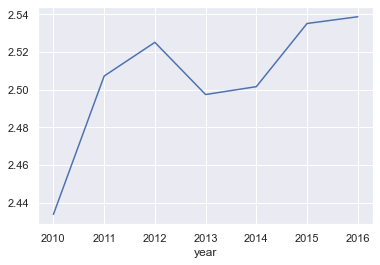

In [145]:
# Bottom 10 - suicide trend
trend_bottom10_reduced = bottom_10_countries_suicide_reduced.groupby(['year']).mean()['suicide_total_pc'].plot();
trend_bottom10_reduced;

#### GDP Trend

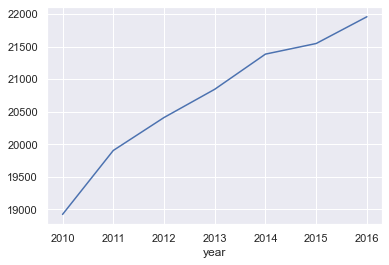

In [146]:
# Top 10 - GDP trend
trend_top10_GDP_reduced = top_10_countries_suicide_reduced.groupby(['year']).mean()['GDP'].plot();
trend_top10_GDP_reduced;

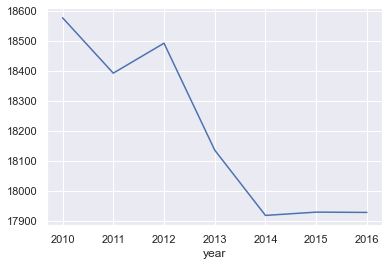

In [147]:
# Bottom 10 - GDP trend
trend_bottom10_GDP_reduced = bottom_10_countries_suicide_reduced.groupby(['year']).mean()['GDP'].plot();
trend_bottom10_GDP_reduced;

### GDP comparrison for top 10 and bottom 10

<AxesSubplot:xlabel='year'>

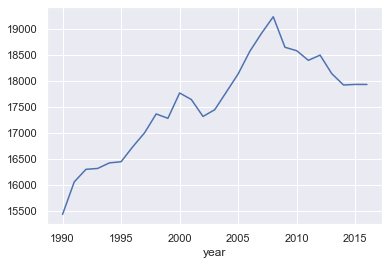

In [156]:
# trend of top 10 - GDP
trend_bottom10_GDP = bottom_10_countries_suicide.groupby(['year']).mean()['GDP'].plot();
trend_bottom10_GDP

<AxesSubplot:xlabel='year'>

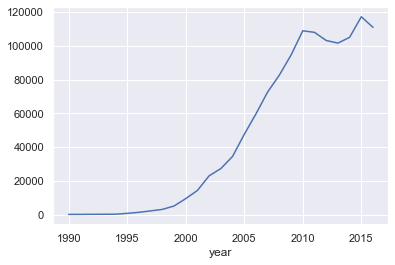

In [157]:
# trend of top 10 - cell
trend_bottom10_cell = bottom_10_countries_suicide.groupby(['year']).mean()['cell_use_pc'].plot();
trend_bottom10_cell

<AxesSubplot:xlabel='year'>

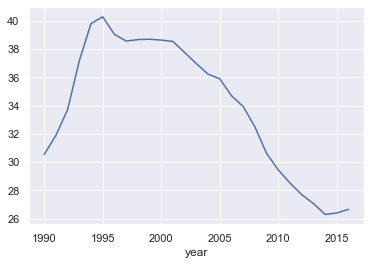

In [158]:
# trend of top 10 and bottom 10
trend_top10 = top_10_countries_suicide.groupby(['year']).mean()['suicide_total_pc'].plot();
trend_top10

<AxesSubplot:xlabel='year'>

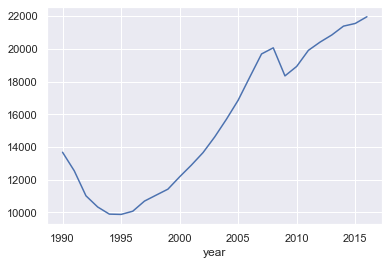

In [159]:
# trend of top 10- GDP
trend_top10_GDP = top_10_countries_suicide.groupby(['year']).mean()['GDP'].plot();
trend_top10_GDP

<AxesSubplot:xlabel='year'>

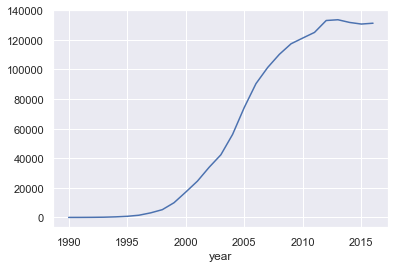

In [160]:
# trend of top 10- cell
trend_top10_cell = top_10_countries_suicide.groupby(['year']).mean()['cell_use_pc'].plot();
trend_top10_cell

In [161]:
# country totals
suicide_totals = less_years.groupby(['country', 'year']).sum()['suicide_total_pc']
suicide_totals

country      year
Afghanistan  1991     5.669173
             1992     5.655172
             1993     5.658228
             1994     5.713450
             1995     5.801105
                       ...    
Zimbabwe     2012    15.343511
             2013    15.149254
             2014    15.294118
             2015    15.434783
             2016    15.714286
Name: suicide_total_pc, Length: 4862, dtype: float64

In [162]:
suicide_totals.describe()

count    4862.000000
mean       10.732655
std         8.148888
min         1.360544
25%         5.014534
50%         8.233160
75%        13.836240
max        51.621622
Name: suicide_total_pc, dtype: float64

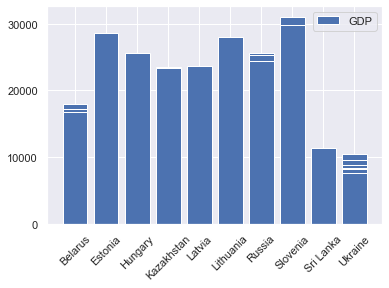

In [163]:
# What is the difference in GDP in countries with the most suicides per capita vs least suicides per capita
# Calculate the average GDP for last 5 years
x_axis = top_10_countries_suicide.country
y_axis = top_10_countries_suicide.GDP
plt.yticks(np.arange(0, 90000, step=10000))
plt.xticks(rotation = 45)
plt.bar(x_axis, y_axis, label='GDP')
plt.legend()

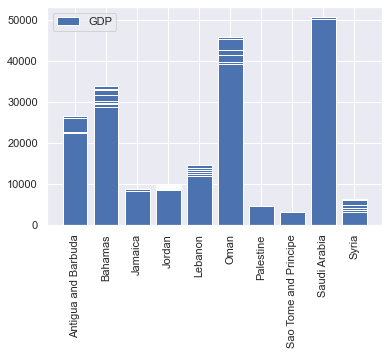

In [164]:
# What is the difference in GDP in countries with the most suicides per capita vs least suicides per capita
# Calculate the average GDP for last 5 years
x_axis = bottom_10_countries_suicide.country
y_axis = bottom_10_countries_suicide.GDP
plt.yticks(np.arange(0, 90000, step=10000))
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis, label='GDP')
plt.legend()

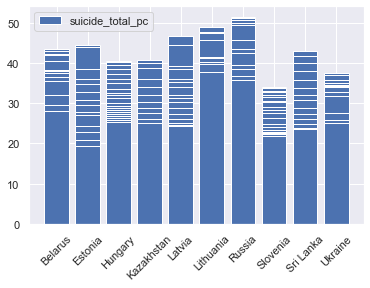

In [165]:
x_axis = top_10_countries_suicide.country
y_axis = top_10_countries_suicide.suicide_total_pc
plt.xticks(rotation = 45)
plt.bar(x_axis, y_axis, label='suicide_total_pc')
plt.legend()

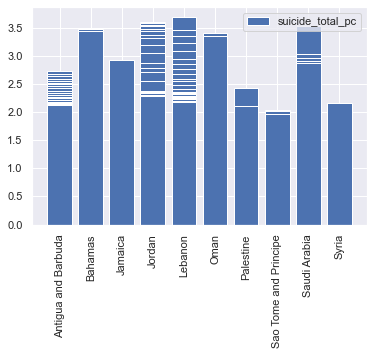

In [166]:
x_axis = bottom_10_countries_suicide.country
y_axis = bottom_10_countries_suicide.suicide_total_pc
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis, label='suicide_total_pc')
plt.legend()

# From 1990 - 2000

In [170]:
# Create df for only 1990 - 2000
main_df_reduced_cell = merged_df.loc[merged_df.year < 2001,:]
main_df_reduced_cell.head()

,country,year,population_total,internet_use,suicide_total,GDP,cell_use,internet_use_%,cell_use_%,suicide_total_%,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,12400000,0.0,703,1860,0,0.0,0.000000,0.005669,0.0,0.000000,5.669355
1,Albania,1990,3290000,0.0,127,4460,0,0.0,0.000000,0.003860,0.0,0.000000,3.860182
2,Algeria,1990,25800000,0.0,806,10300,470,0.0,0.001822,0.003124,0.0,1.821705,3.124031
3,Andorra,1990,54500,0.0,5,28400,0,0.0,0.000000,0.009174,0.0,0.000000,9.174312
4,Angola,1990,11800000,0.0,645,4760,0,0.0,0.000000,0.005466,0.0,0.000000,5.466102


In [172]:
# Create df with columns per capita only
pc_df_reduced_cell = main_df_reduced_cell.iloc[:, np.r_[:2, 5:6, 10:13]]
pc_df_reduced_cell.head(3)

,country,year,GDP,internet_use_pc,cell_use_pc,suicide_total_pc
0,Afghanistan,1990,1860,0.0,0.000000,5.669355
1,Albania,1990,4460,0.0,0.000000,3.860182
2,Algeria,1990,10300,0.0,1.821705,3.124031


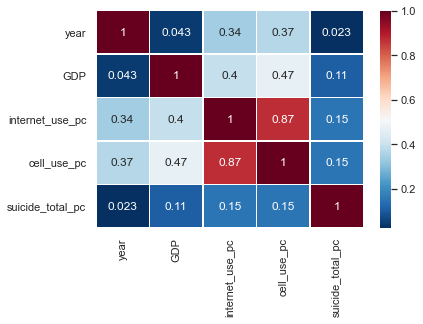

In [173]:
# Plotting correlation coeficient heat map.
pearsoncorr_reduced_cell = pc_df_reduced_cell.corr(method='pearson')
pearsoncorr_reduced_cell
sns.heatmap(pearsoncorr_reduced_cell, 
            xticklabels=pearsoncorr_reduced_cell,
            yticklabels=pearsoncorr_reduced_cell,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);